<a href="https://colab.research.google.com/github/kjmobile/B735/blob/main/2_Customer_Churn_Survival_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Churn Prediction - Survival Analysis


**Customers who left within the last month** – the column is called Churn Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges Demographic info about customers – gender, age range, and if they have partners and dependents

Libraries and data loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data churn.csv

In [2]:
churn = pd.read_csv("https://raw.githubusercontent.com/kjmobile/data/refs/heads/main/ml/churn.csv")
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Remove irrelevant columns

In [3]:
churn.drop(["customerID"], inplace = True, axis = 1)
churn.drop(["TotalCharges"], inplace = True, axis = 1)

In [4]:
churn

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,Yes


### Gender, SeniorCitizen, Partner, Dependents

In [5]:
def get_plot(df, group, target, ax):
    temp_df = (df.groupby([group, target]).size()/df.groupby(group)[target].count()).reset_index().pivot(columns=target, index=group, values=0)
    temp_df.plot(kind='bar', stacked=True, ax=ax, rot=True)
    ax.grid(ls='--',lw=.5, alpha=.3)
    ax.legend(loc='lower right')
    ax.set(xlabel=group, ylabel='Churn %', facecolor="#fffff2")

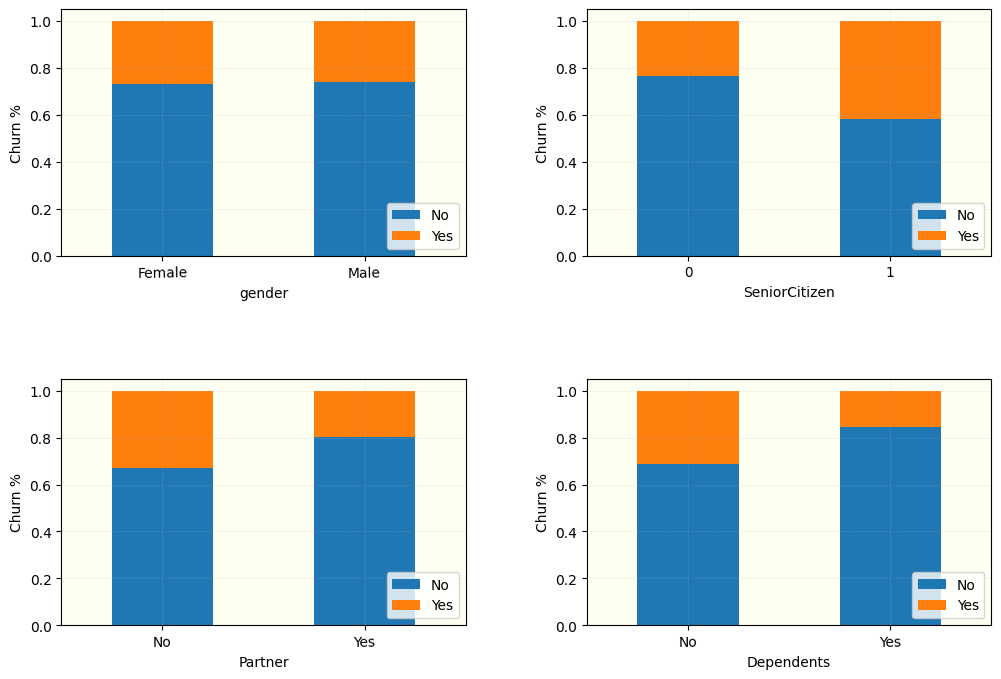

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
get_plot(churn, "gender", "Churn", axes[0, 0])
get_plot(churn, "SeniorCitizen", "Churn", axes[0, 1])
get_plot(churn, "Partner", "Churn", axes[1, 0])
get_plot(churn, "Dependents", "Churn", axes[1, 1])
plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

From above plots, we can say following:

Gender alone does not help us predict the customer churn.
If a person is young and has a family, he or she is less likely to stop the service as we can see below.

### Tenure

In [7]:
churn['tenure'].describe()

,tenure
count,7043.000000
mean,32.372710
std,24.557454
min,1.000000
25%,9.000000
50%,29.000000
75%,55.000000
max,72.000000


In [8]:
churn['tenure'].value_counts().head(10)

,count
tenure,
1,624
72,362
2,238
3,200
4,176
71,170
5,133
7,131
8,123


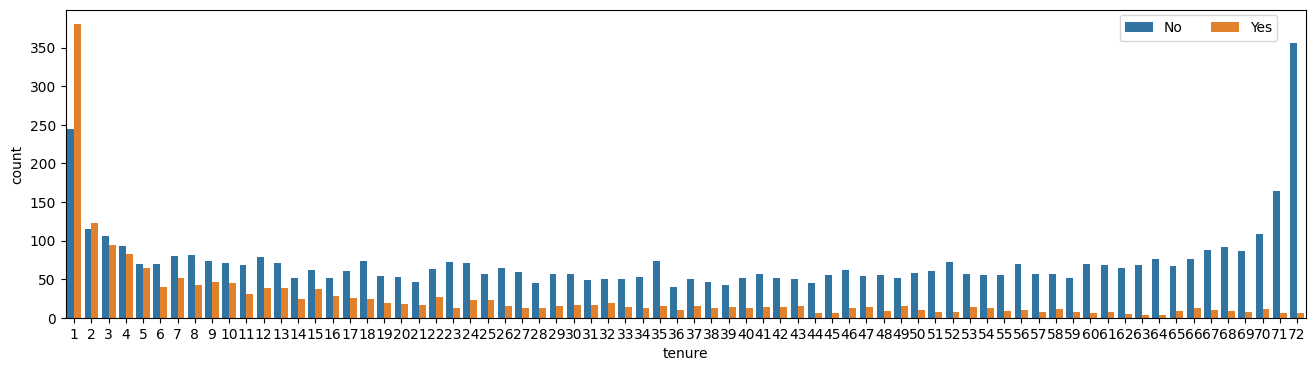

In [9]:
plt.figure(figsize=(16,4))
sns.countplot(x="tenure", hue="Churn", data=churn)
plt.legend(loc=[.85,.9], ncol=2)
plt.show()

Converting into 5 groups to reduce model complexity.

In [10]:
def group_tenure(series):
    return pd.cut(
        series,
        bins=[0, 12, 24, 36, 48, 60, float("inf")],
        labels=[1, 2, 3, 4, 5, 6],
        right=True)

churn["tenure_group"] = group_tenure(churn["tenure"])

In [11]:
churn["tenure_group"].value_counts()

,count
tenure_group,
1,2186
6,1407
2,1024
3,832
5,832
4,762


<Axes: xlabel='tenure_group', ylabel='count'>

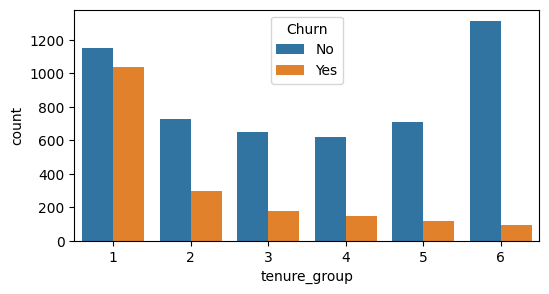

In [12]:
plt.figure(figsize=(6,3))
sns.countplot(x="tenure_group", hue="Churn", data=churn)

## OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies


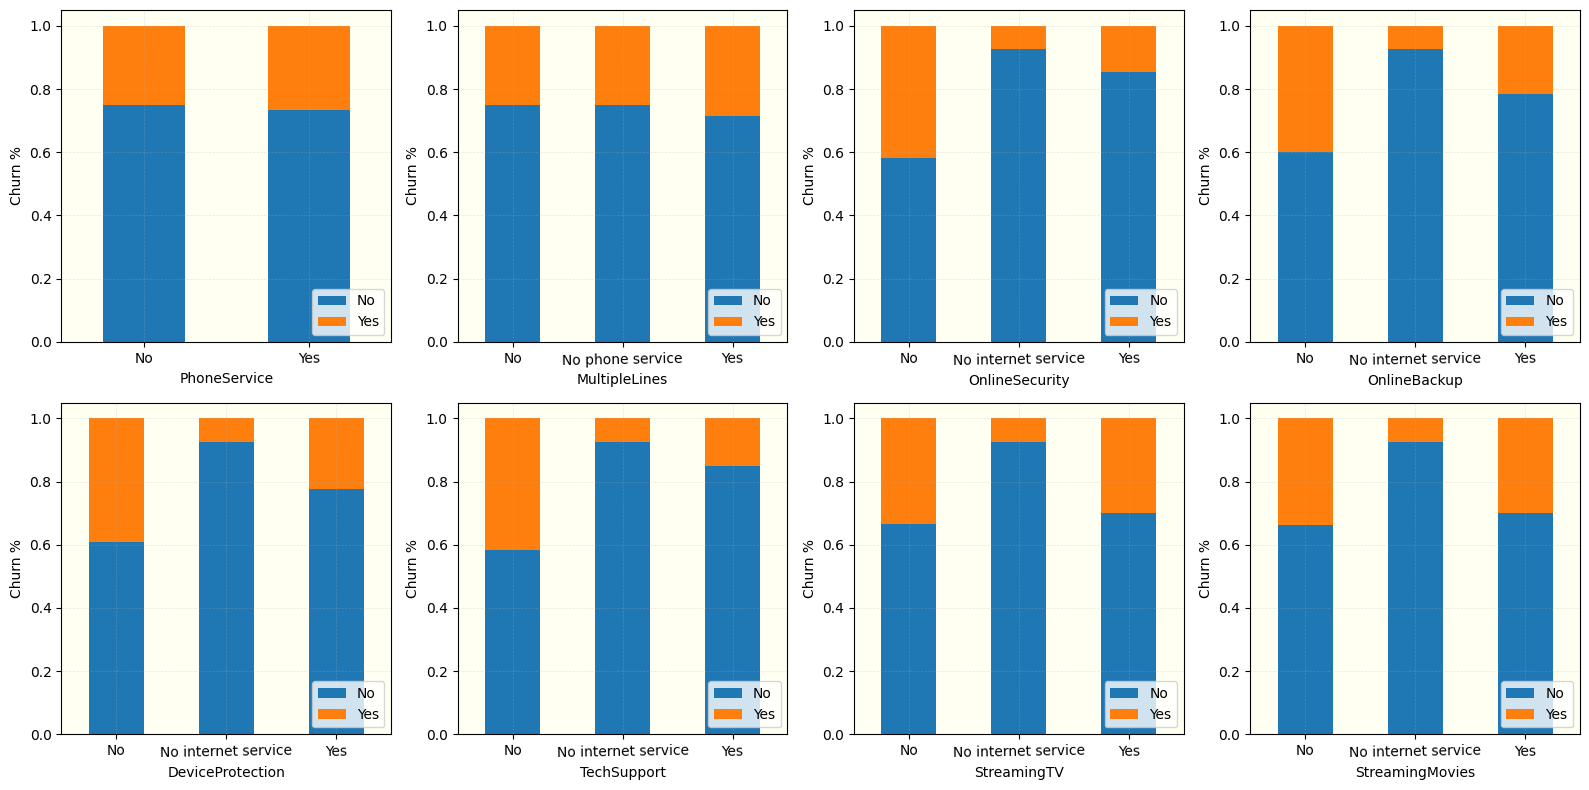

In [13]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
features = ["PhoneService", "MultipleLines", "OnlineSecurity", "OnlineBackup","DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
for i, feature in enumerate(features):
    row, col = divmod(i, 4)
    get_plot(churn, feature, "Churn", ax=axes[row, col])
plt.tight_layout()
plt.show()

As we can see multiplelines and phoneservice do not add value in the model having similar churn rate.

In all above categories we see consistent results. If a person does not opt for internet service, the customer churning is less. The reason might be the less cost of the service. Also, if they have internet service and does not opt for specific service their probability of churning is high.

# Customer Survival Analysis - Statistical Methods

## Non - Parametric Method
Kaplan Meier and Log Rank Tests

In [17]:
# uncomment if lifelines is not installed
!pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 12.0 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=2efe32bd00145a1f47ea2500f1ab6edf67e5c8eb3448db1beda5d0cca0a0ef56
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


In [18]:
from scipy.stats import norm
import statsmodels.api as st
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

from lifelines import KaplanMeierFitter
from lifelines.statistics import multivariate_logrank_test
from lifelines.statistics import logrank_test
from lifelines import CoxPHFitter

## Data Preparation

In [19]:
churn

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,tenure_group
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No,1
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No,3
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No,4
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,No,2
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,No,6
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,No,1
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,Yes,1


In [20]:
churn.Churn = labelencoder.fit_transform(churn.Churn)
churn.Churn.value_counts()

,count
Churn,
0,5174
1,1869


### Create dummy variables for all categorical variables, for analysis

In [21]:
categorical = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod']

survivaldata = pd.get_dummies(churn, columns = categorical, drop_first= True)
survivaldata.head()

,tenure,MonthlyCharges,Churn,tenure_group,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,0,1,False,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,34,56.95,0,3,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,2,53.85,1,1,True,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,45,42.30,0,4,True,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,2,70.70,1,1,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


### Create event and churn as series

In [22]:
event = churn['Churn']
duration = churn['tenure']

In [23]:
survivaldata.drop(['tenure', 'Churn', 'tenure_group'], axis = 1, inplace= True)
survivaldata = st.add_constant(survivaldata, prepend=False)
survivaldata.head()

,MonthlyCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,const
0,29.85,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,True,False,True,False,1.0
1,56.95,True,False,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,True,1.0
2,53.85,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,True,1.0
3,42.30,True,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,1.0
4,70.70,False,False,False,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,1.0


## Kaplan Meier Curve

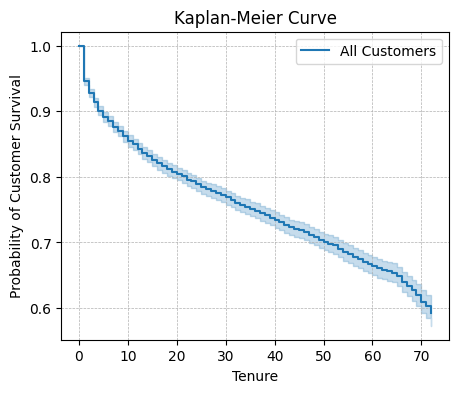

In [24]:
kmf = KaplanMeierFitter()
kmf.fit(duration,event,label = "All Customers")
kmf.plot(figsize=(5,4))

plt.grid(ls='--', lw=.5)
plt.ylabel('Probability of Customer Survival')
plt.xlabel('Tenure')
plt.title('Kaplan-Meier Curve');

As we can see, there is a sudden drop in the starting which says that after one tenure only customers starts churning rapidly and after that churning rate decreases.
To deal with that we can consider giving more discounts on long-term plans and make more customers to subscribe for long term plans.

## Group Analysis: Log Rank Test

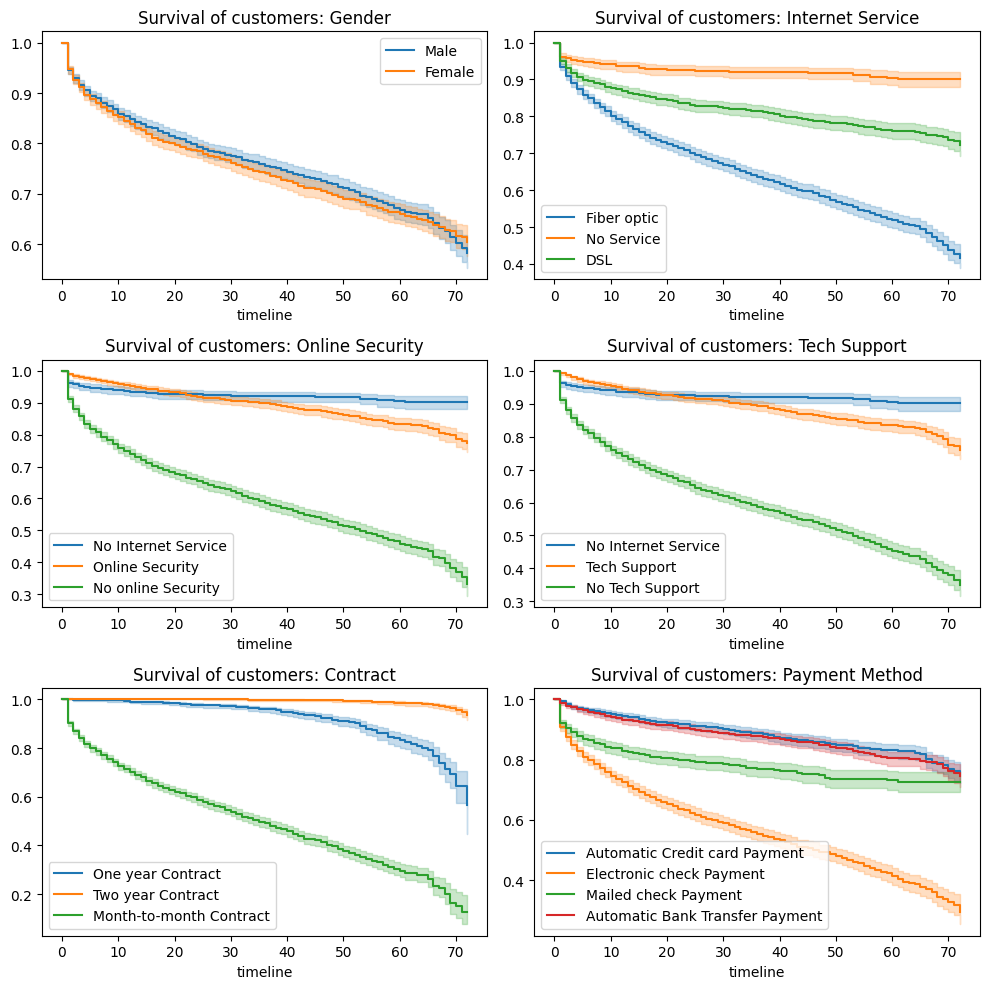

In [25]:
fig, axes = plt.subplots(3, 2, figsize=(10, 10))

# Define features and their categories in a dictionary
plots = [
    # [row, col, title, feature definition dictionary]
    [0, 0, 'Gender', {
        'Male': ('gender_Male', 1),
        'Female': ('gender_Male', 0)
    }],
    [0, 1, 'Internet Service', {
        'Fiber optic': ('InternetService_Fiber optic', 1),
        'No Service': ('InternetService_No', 1),
        'DSL': (None, None, lambda df: (df['InternetService_Fiber optic'] == 0) & (df['InternetService_No'] == 0))
    }],
    [1, 0, 'Online Security', {
        'No Internet Service': ('OnlineSecurity_No internet service', 1),
        'Online Security': ('OnlineSecurity_Yes', 1),
        'No online Security': (None, None, lambda df: (df['OnlineSecurity_No internet service'] == 0) & (df['OnlineSecurity_Yes'] == 0))
    }],
    [1, 1, 'Tech Support', {
        'No Internet Service': ('TechSupport_No internet service', 1),
        'Tech Support': ('TechSupport_Yes', 1),
        'No Tech Support': (None, None, lambda df: (df['TechSupport_No internet service'] == 0) & (df['TechSupport_Yes'] == 0))
    }],
    [2, 0, 'Contract', {
        'One year Contract': ('Contract_One year', 1),
        'Two year Contract': ('Contract_Two year', 1),
        'Month-to-month Contract': (None, None, lambda df: (df['Contract_One year'] == 0) & (df['Contract_Two year'] == 0))
    }],
    [2, 1, 'Payment Method', {
        'Automatic Credit card Payment': ('PaymentMethod_Credit card (automatic)', 1),
        'Electronic check Payment': ('PaymentMethod_Electronic check', 1),
        'Mailed check Payment': ('PaymentMethod_Mailed check', 1),
        'Automatic Bank Transfer Payment': (None, None, lambda df: (df['PaymentMethod_Credit card (automatic)'] == 0) &
                                       (df['PaymentMethod_Electronic check'] == 0) &
                                       (df['PaymentMethod_Mailed check'] == 0))
    }]
]

# Loop to create each plot
for row, col, title, categories in plots:
    for label, condition in categories.items():
        if len(condition) == 2:  # Simple condition
            column, value = condition
            mask = (survivaldata[column] == value)
        else:  # Complex condition (using lambda)
            mask = condition[2](survivaldata)

        kmf.fit(duration[mask], event_observed=event[mask], label=label)
        kmf.plot(ax=axes[row, col])

    axes[row, col].set_title(f'Survival of customers: {title}')

# Adjust layout and display
plt.tight_layout()
plt.show()

In [26]:
from lifelines.statistics import logrank_test

for title, groups in [(p[2], p[3]) for p in plots]:
    print(f"\n{title}:")
    for (name1, cond1), (name2, cond2) in [(i, j) for idx, i in enumerate(groups.items()) for j in list(groups.items())[idx+1:]]:
        mask1 = survivaldata[cond1[0]] == cond1[1] if len(cond1) == 2 else cond1[2](survivaldata)
        mask2 = survivaldata[cond2[0]] == cond2[1] if len(cond2) == 2 else cond2[2](survivaldata)
        result = logrank_test(duration[mask1], duration[mask2],event_observed_A=event[mask1], event_observed_B=event[mask2])
        print(f"  {name1} vs {name2}: p={result.p_value:.4f} {'*' if result.p_value < 0.05 else ''}")


Gender:
  Male vs Female: p=0.4677 

Internet Service:
  Fiber optic vs No Service: p=0.0000 *
  Fiber optic vs DSL: p=0.0000 *
  No Service vs DSL: p=0.0000 *

Online Security:
  No Internet Service vs Online Security: p=0.0009 *
  No Internet Service vs No online Security: p=0.0000 *
  Online Security vs No online Security: p=0.0000 *

Tech Support:
  No Internet Service vs Tech Support: p=0.0002 *
  No Internet Service vs No Tech Support: p=0.0000 *
  Tech Support vs No Tech Support: p=0.0000 *

Contract:
  One year Contract vs Two year Contract: p=0.0000 *
  One year Contract vs Month-to-month Contract: p=0.0000 *
  Two year Contract vs Month-to-month Contract: p=0.0000 *

Payment Method:
  Automatic Credit card Payment vs Electronic check Payment: p=0.0000 *
  Automatic Credit card Payment vs Mailed check Payment: p=0.0000 *
  Automatic Credit card Payment vs Automatic Bank Transfer Payment: p=0.3517 
  Electronic check Payment vs Mailed check Payment: p=0.0000 *
  Electronic che

## Semi-Parametric Method

Cox Regression, Penalized Cox Models (Lasso, Elastic Net)

In [27]:
def datapreparation(filepath):

    df = pd.read_csv(filepath)
    df.drop(["customerID","TotalCharges"], inplace = True, axis = 1)

    #df.TotalCharges = df.TotalCharges.replace(" ",np.nan)
    #df.TotalCharges.fillna(0, inplace = True)
    #df.TotalCharges = df.TotalCharges.astype(float)

    cols1 = ['Partner', 'Dependents', 'PaperlessBilling', 'Churn', 'PhoneService']
    for col in cols1:
        df[col] = df[col].apply(lambda x: 0 if x == "No" else 1)

    df.gender = df.gender.apply(lambda x: 0 if x == "Male" else 1)
    df.MultipleLines = df.MultipleLines.map({'No phone service': 0, 'No': 0, 'Yes': 1})

    cols2 = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
    for col in cols2:
        df[col] = df[col].map({'Yes': 1, 'No internet service': 0, 'No': 0})

    categories = ['InternetService', 'Contract', 'PaymentMethod']

    df = pd.get_dummies(df, columns = categories, drop_first=True)

    return df

In [29]:
regression_df = datapreparation("https://raw.githubusercontent.com/kjmobile/data/refs/heads/main/ml/churn.csv")
regression_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   MultipleLines                          7043 non-null   int64  
 7   OnlineSecurity                         7043 non-null   int64  
 8   OnlineBackup                           7043 non-null   int64  
 9   DeviceProtection                       7043 non-null   int64  
 10  TechSupport                            7043 non-null   int64  
 11  Stre

In [30]:
cph = CoxPHFitter()
cph.fit(regression_df, duration_col='tenure', event_col='Churn')

cph.print_summary()

<lifelines.CoxPHFitter: fitted with 7043 total observations, 5174 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn'
      baseline estimation = breslow
   number of observations = 7043
number of events observed = 1869
   partial log-likelihood = -13884.62
         time fit was run = 2025-04-21 04:15:22 UTC

---
                                       coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                              
gender                                 0.09      1.09      0.05           -0.01            0.18                0.99                1.19
SeniorCitizen                         -0.07      0.93      0.06           -0.18            0.04                0.83                1.04
Partner                               -0.52      0.60      0.06           -0.63           -0.41                0.53                0.66
Dependents                            -0.05      0.95      0.07           -0.19            0.08                0.83                1.08
PhoneService                           0.25      1.29      0.47           -0.67            1.18                0.51                3.25
MultipleLines                         -0.42      0.66      0.13           -0.67           -0.17                0.51                0.84
OnlineSecurity                        -0.61      0.54      0.13           -0.87           -0.35                0.42                0.70
OnlineBackup                          -0.61      0.54      0.13           -0.86           -0.36                0.42                0.69
DeviceProtection                      -0.28      0.75      0.13           -0.53           -0.04                0.59                0.96
TechSupport                           -0.37      0.69      0.13           -0.63           -0.11                0.53                0.90
StreamingTV                            0.04      1.04      0.24           -0.42            0.50                0.66                1.66
StreamingMovies                       -0.05      0.95      0.24           -0.52            0.41                0.60                1.50
PaperlessBilling                       0.18      1.20      0.06            0.07            0.29                1.07                1.34
MonthlyCharges                        -0.01      0.99      0.02           -0.05            0.04                0.95                1.04
InternetService_Fiber optic            0.59      1.80      0.58           -0.54            1.71                0.58                5.55
InternetService_No                    -1.30      0.27      0.59           -2.45           -0.15                0.09                0.86
Contract_One year                     -1.62      0.20      0.09           -1.79           -1.44                0.17                0.24
Contract_Two year                     -3.23      0.04      0.16           -3.56           -2.91                0.03                0.05
PaymentMethod_Credit card (automatic) -0.08      0.92      0.09           -0.26            0.09                0.77                1.10
PaymentMethod_Electronic check         0.59      1.80      0.07            0.45            0.73                1.56                2.07
PaymentMethod_Mailed check             0.57      1.76      0.09            0.39            0.74                1.48                2.09

                                       cmp to      z      p  -log2(p)
covariate                                                            
gender                                   0.00   1.84   0.07      3.93
SeniorCitizen                            0.00  -1.26   0.21      2.27
Partner                                  0.00  -9.40 <0.005     67.30
Dependents                               0.00  -0.78   0.43      1.20
PhoneService                             0.00   0.54   0.59      0.76
MultipleLines   

In [31]:
cph.concordance_index_

np.float64(0.8664596105829797)

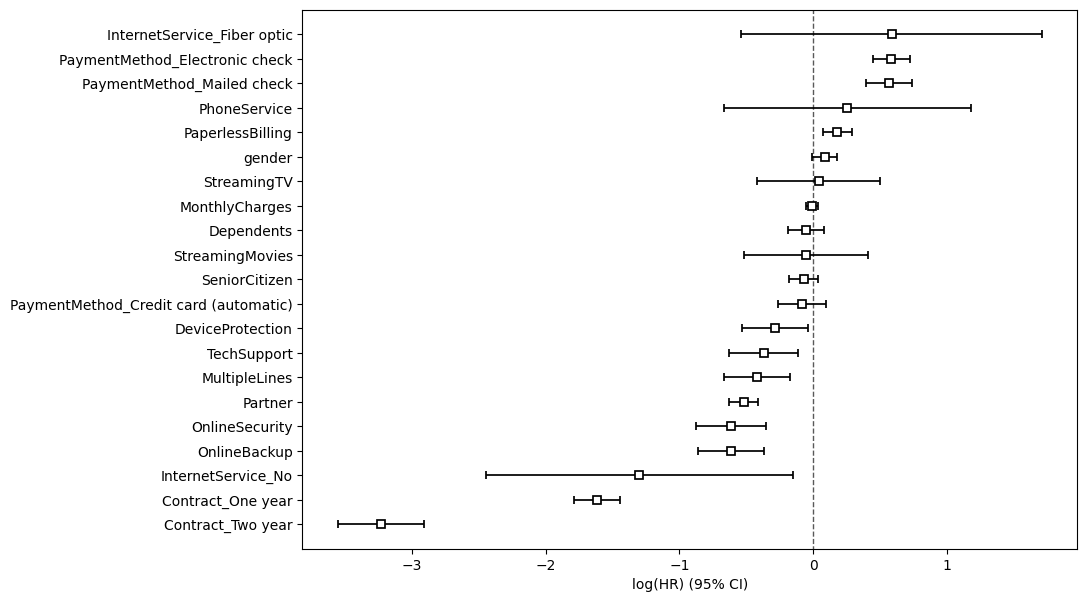

In [32]:
fig, ax = plt.subplots(figsize = (10,7))
cph.plot(ax = ax);

In [33]:
test_id = regression_df.sample(1)

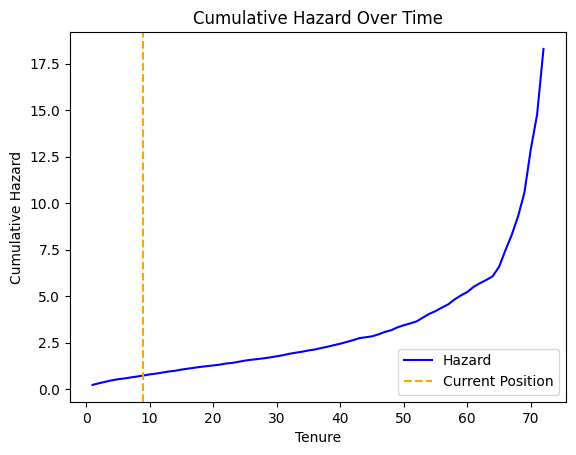

In [34]:
fig, ax = plt.subplots()
cph.predict_cumulative_hazard(test_id).plot(ax = ax, color = 'blue')
plt.axvline(x=test_id.tenure.values[0], color = 'orange', linestyle='--')
plt.legend(labels=['Hazard','Current Position'])
ax.set_xlabel('Tenure', size = 10)
ax.set_ylabel('Cumulative Hazard', size = 10)
ax.set_title('Cumulative Hazard Over Time');

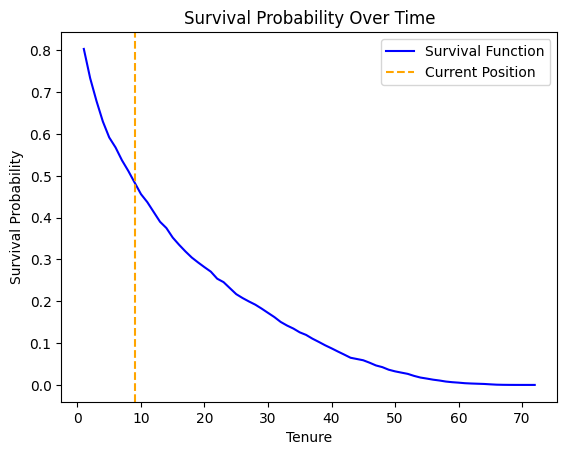

In [35]:
fig, ax = plt.subplots()
cph.predict_survival_function(test_id).plot(ax = ax, color = 'blue')
plt.axvline(x=test_id.tenure.values[0], color = 'orange', linestyle='--')
plt.legend(labels=['Survival Function','Current Position'])
ax.set_xlabel('Tenure', size = 10)
ax.set_ylabel('Survival Probability', size = 10)
ax.set_title('Survival Probability Over Time');

In [36]:
life = cph.predict_survival_function(test_id).reset_index()
life.columns = ['Tenure', 'Probability']
max_life = life.Tenure[life.Probability > 0.1].max()

LTV = max_life * test_id['MonthlyCharges'].values[0]


print('LTV of a testid is:', LTV, 'dollars.')

LTV of a testid is: 2804.4 dollars.


<Axes: >

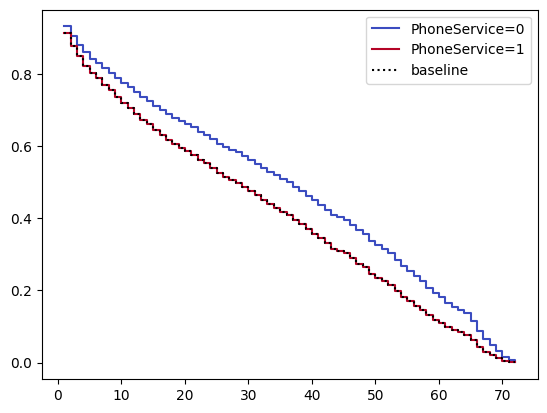

In [37]:
cph.plot_partial_effects_on_outcome(covariates = 'PhoneService', values = [0,1], cmap = 'coolwarm')

In [38]:
cph.check_assumptions(regression_df, p_value_threshold = 0.05)

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 7043 total observations, 5174 right-censored observations>
         test_name = proportional_hazard_test

---
                                            test_statistic      p  -log2(p)
Contract_One year                     km             54.33 <0.005     42.42
                                      rank           39.63 <0.005     31.60
Contract_Two year                     km             29.78 <0.005     24.30
                                      rank           16.74 <0.005     14.51
Dependents                            km              0.00   0.99      0.02
                                      rank            0.00   0.95      0.07
DeviceProtection                      km              2.31   0.13      2.96
                                      rank            3.72   0.05      4.22
InternetService_Fiber optic           km              0.93   0.33      1.58
                                      rank            1.87   0.17      2.54
InternetService_No                    km              1.33   0.25      2.01
                                      rank            2.23   0.14      2.89
MonthlyCharges                        km              0.58   0.45      1.16
                                      rank            1.35   0.25      2.02
MultipleLines                         km              5.73   0.02      5.91
                                      rank            7.91 <0.005      7.67
OnlineBackup                          km              3.71   0.05      4.21
                                      rank            4.67   0.03      5.03
OnlineSecurity                        km              5.44   0.02      5.67
                                      rank            7.81   0.01      7.59
PaperlessBilling                      km              0.19   0.66      0.59
                                      rank            0.00   0.96      0.05
Partner                               km              3.20   0.07      3.76
                                      rank            4.48   0.03      4.87
PaymentMethod_Credit card (automatic) km              0.56   0.46      1.13
                                      rank            0.68   0.41      1.28
PaymentMethod_Electronic check        km              3.79   0.05      4.27
                                      rank            4.64   0.03      5.00
PaymentMethod_Mailed check            km              6.50   0.01      6.53
                                      rank            8.82 <0.005      8.39
PhoneService                          km              0.77   0.38      1.40
                                      rank            1.62   0.20      2.29
SeniorCitizen                         km              0.01   0.94      0.09
                                      rank            0.03   0.86      0.22
StreamingMovies                       km              2.15   0.14      2.81
                                      rank            3.44   0.06      3.97
StreamingTV                           km              2.60   0.11      3.22
                                      rank            3.98   0.05      4.44
TechSupport                           km              5.82   0.02      5.98
                                      rank            7.88 <0.005      7.65
gender                                km              0.47   0.49      1.02
                                      rank            0.09   0.76      0.39



1. Variable 'Partner' failed the non-proportional test: p-value is 0.0343.

   Advice: with so few unique values (only 2), you can include `strata=['Partner', ...]` in the call
in `.fit`. See documentation in link [E] below.

2. Variable 'MultipleLines' failed the non-proportional test: p-value is 0.0049.

   Advice: with so few unique values (only 2), you can include `strata=['MultipleLines', ...]` in
the call in `.fit`. See documentation in link [E] below.

3. Variable 'OnlineSecurity' failed the non-proportional test: p-value is 0.0052.

   Advice: with so few unique values (only 2), you can include `strata=['OnlineSecurity', ...]` in
the call in `.fit`. See documentation in link [E] below.

4. Variable 'OnlineBackup' failed the non-proportional test: p-value is 0.0306.

   Advice: with so few unique values (only 2), you can include `strata=['OnlineBackup', ...]` in the
call in `.fit`. See documentation in link [E] below.

5. Variable 'DeviceProtection' failed the non-proportional

[]

# CoxPh model modification
- droping variables that violates ph assumption

The step above identifies variables that violate the proportional hazards (PH) assumption.<br>
By stratifying on these variables — that is, grouping the dataset by their values and allowing each group to have its own baseline hazard — we relax the assumption that hazard functions are the same across all groups.
This lets the model accommodate time-varying effects for these variables without estimating their coefficients by setting `starta = violated_variables`.
It improves model validity for interpretation, even if some predictive performance is sacrificed.

In [41]:
from lifelines.statistics import proportional_hazard_test

# Detect variables that violate the PH assumption
results = proportional_hazard_test(cph, regression_df, time_transform='rank')
strata_vars = results.summary[results.summary['p'] < 0.05].index.tolist()

# Fit a new Cox model with those variables stratified (separate baseline hazards per group)
cph_stratified = CoxPHFitter()
cph_stratified.fit(regression_df, duration_col='tenure', event_col='Churn', strata=strata_vars)

# Print model summary (note: stratified variables will not appear in coefficients)
cph_stratified.print_summary()


<lifelines.CoxPHFitter: fitted with 7043 total observations, 5174 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn'
                   strata = ['Contract_One year', 'Contract_Two year', 'MultipleLines', 'OnlineBackup', 'OnlineSecurity', 'Partner', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'StreamingTV', 'TechSupport']
      baseline estimation = breslow
   number of observations = 7043
number of events observed = 1869
   partial log-likelihood = -5923.40
         time fit was run = 2025-04-21 04:16:11 UTC

---
                                       coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                              
gender                                 0.05      1.06      0.05           -0.04            0.15                0.96                1.16
SeniorCitizen                         -0.07      0.94      0.06           -0.18            0.05                0.83                1.05
Dependents                            -0.00      1.00      0.07           -0.15            0.14                0.86                1.15
PhoneService                           0.43      1.54      0.50           -0.56            1.42                0.57                4.14
DeviceProtection                      -0.22      0.80      0.13           -0.48            0.04                0.62                1.04
StreamingMovies                        0.06      1.06      0.25           -0.44            0.55                0.65                1.74
PaperlessBilling                       0.20      1.22      0.06            0.08            0.32                1.09                1.37
MonthlyCharges                        -0.02      0.98      0.02           -0.07            0.03                0.93                1.03
InternetService_Fiber optic            0.84      2.31      0.62           -0.37            2.04                0.69                7.71
InternetService_No                    -1.44      0.24      0.63           -2.68           -0.21                0.07                0.81
PaymentMethod_Credit card (automatic) -0.05      0.95      0.10           -0.24            0.15                0.79                1.16

                                       cmp to     z      p  -log2(p)
covariate                                                           
gender                                   0.00  1.10   0.27      1.87
SeniorCitizen                            0.00 -1.12   0.26      1.94
Dependents                               0.00 -0.03   0.98      0.03
PhoneService                             0.00  0.86   0.39      1.36
DeviceProtection                         0.00 -1.65   0.10      3.34
StreamingMovies                          0.00  0.24   0.81      0.30
PaperlessBilling                         0.00  3.35 <0.005     10.29
MonthlyCharges                           0.00 -0.81   0.42      1.25
InternetService_Fiber optic              0.00  1.36   0.17      2.52
InternetService_No                       0.00 -2.29   0.02      5.52
PaymentMethod_Credit card (automatic)    0.00 -0.47   0.64      0.65
---
Concordance = 0.61
Partial AIC = 11868.79
log-likelihood ratio test = 176.62 on 11 df
-log2(p) of ll-ratio test = 103.95

In [42]:
cph_stratified.concordance_index_

np.float64(0.6099253139015597)

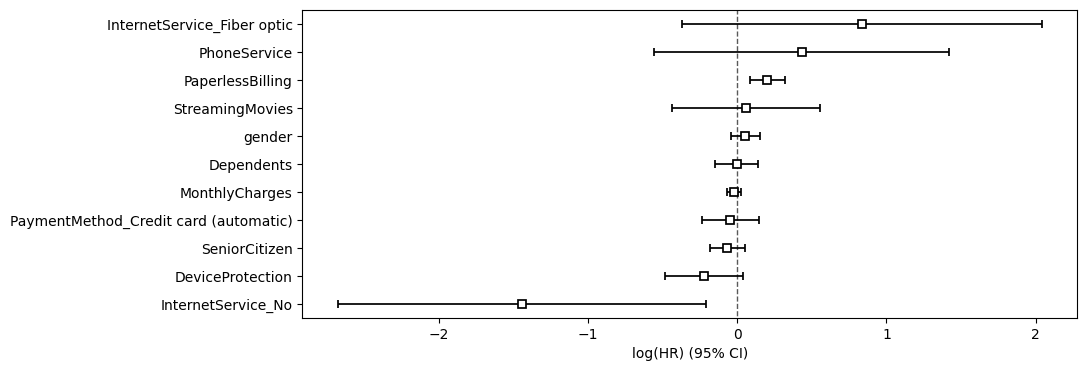

In [43]:
fig, ax = plt.subplots(figsize = (10,4))
cph_stratified.plot(ax = ax);